### **CNN Tutorial**


In [1]:
import torch
import torch.utils.data.dataloader as dataloader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### **FashionMnist Dataset**

In [2]:
# Load the FashionMnist Dataset
train_dataset = datasets.FashionMNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True)

In [3]:
# Print the shape
print(train_dataset.data.shape)
print(test_dataset.data.shape)

# Print the label names
print(train_dataset.classes)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


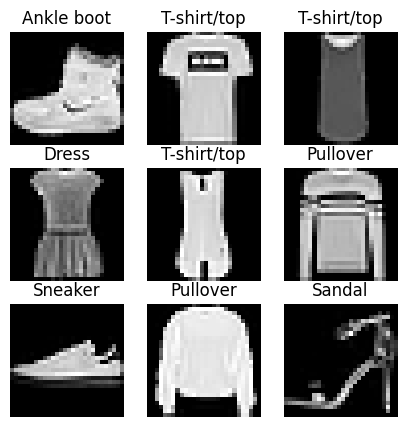

In [4]:
# Show 9 images and their lables
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_dataset.data[i], cmap='gray')
    plt.title(train_dataset.classes[train_dataset.targets[i]])
    plt.axis('off')
plt.show()

In [5]:
# Prepare the Data
train_loader = dataloader.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = dataloader.DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

### **Build a CNN model**

Remember:
$$ H_{out} = \frac{H_{in}-kernel\_size + 2*padding}{stride} + 1$$
$$ W_{out} = \frac{W_{in}-kernel\_size + 2*padding}{stride} + 1$$

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=0) 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(16*5*5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x)) # output shape: (8, 26, 26)
        x = self.pool(x) # output shape: (8, 13, 13)
        x = F.relu(self.conv2(x)) # output shape: (16, 11, 11)
        x = self.pool(x) # output shape: (16, 5, 5)
        x = x.view(x.size(0), -1)  # flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
# Initialize the model
model = CNN().to(device)
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

### **Train the Data**

In [ ]:
def main(n_epochs, model, loss, optimizer, train_loader, test_loader):
    training_loss = []
    testing_loss = []
    testing_accuracy = []

    for epoch in range(1, n_epochs+1):
        # Training
        running_loss = 0.0
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss_val = loss(outputs, labels)
            loss_val.backward()
            optimizer.step()

            running_loss += loss_val.item()

        train_loss = running_loss / len(train_loader)
        training_loss.append(train_loss)

        # Testing
        model.eval()
        eval_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)
                pred = torch.argmax(outputs, 1)
                test_loss = loss(outputs, labels)
                eval_loss += test_loss.item()

            total += labels.size(0)
            correct += (pred == labels).sum().item()
        
        test_loss = eval_loss / len(test_loader)
        testing_loss.append(test_loss)
        accuracy = correct / total
        testing_accuracy.append(accuracy)

        # Save the best model
        if epoch == 1:
            best_accuracy = accuracy
        else:
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                torch.save(model.state_dict(), 'best_model.pth')

        if epoch % 5 == 0:
            print(f'Epoch {epoch}/{n_epochs}, Training Loss: {train_loss:.4f}, Testing Loss: {test_loss:.4f}, Testing Accuracy: {accuracy:.4f}')

    print('The best accuracy is:', best_accuracy)

    return training_loss, testing_loss, testing_accuracy

In [ ]:
training_loss, testing_loss, testing_accuracy = main(20, model, loss, optimizer, train_loader, test_loader)

In [ ]:
# Plot the training and testing loss
def plot(training_loss, testing_loss, testing_accuracy):
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(training_loss, label='Training Loss')
    plt.plot(testing_loss, label='Testing Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Testing Accuracy')
    plt.plot(testing_accuracy)
    plt.show()

plot(training_loss, testing_loss, testing_accuracy)

### **Fine Tune the model**

1. Batch size?
2. Learning rate?
3. Training epoch?
4. Model Architecture? (Kernel numbers, Convolution Layers, Number of hidden units in FC layers...)

### **Exercise**
Please build a CNN model to predict the labels in CIFAR-10 Dataset

In [ ]:
# Load the CIFAR10 Dataset
train_dataset = datasets.CIFAR10(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.CIFAR10(root='data/', train=False, transform=transforms.ToTensor(), download=True)

In [ ]:
# Show the shpae of CIFAR10
print(train_dataset.data.shape)
print(test_dataset.data.shape)

In [ ]:
# Prepare the Data
train_loader2 = dataloader.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader2 = dataloader.DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

In [ ]:
# Show some images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_dataset.data[i])
    plt.title(train_dataset.classes[train_dataset.targets[i]])
    plt.axis('off')
plt.show()

In [ ]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()

    def forward(self, x):
        pass